# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [12]:
!pip install mysql-connector-python

In [13]:
conda list | findstr mysql-connector-python

mysql-connector-python    8.4.0                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [114]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [115]:
con = mysql.connector.connect(user = 'user1', password = '7oygWy6P', host = '3.68.62.36', database = 'employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [116]:
cursor = con.cursor()

In [117]:
sql = """
SELECT MIN(hire_date), MAX(hire_date)
FROM employees
"""

In [118]:
cursor.execute(sql)

In [119]:
cursor.fetchall()

[(datetime.date(1985, 1, 1), datetime.date(2000, 1, 28))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [120]:
sql_salary = """
SELECT emp_no, salary, from_date, to_date
FROM salaries
WHERE (emp_no, to_date) IN (
    SELECT emp_no, MAX(to_date)
    FROM salaries
    GROUP BY emp_no
)
"""

In [121]:
cursor.execute(sql_salary)

In [122]:
import pandas as p

In [123]:
field_names = [i[0] for i in cursor.description]

In [124]:
res = pd.DataFrame(cursor.fetchall(), columns=field_names)

In [125]:
display(res.columns, res.shape, res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300180, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [126]:
res.dtypes

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object

In [127]:
from datetime import datetime, date

In [128]:
date(9999, 1, 1)

datetime.date(9999, 1, 1)

In [129]:
(res.to_date == date(9999, 1, 1)).value_counts()

to_date
True     240124
False     60056
Name: count, dtype: int64

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [141]:
res[res.to_date == date(9999, 1, 1)].head(4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01


In [142]:
res_current = res[res.to_date == date(9999, 1, 1)]

In [148]:
res_current[['salary', 'to_date']].head()

,salary,to_date
0,88958,9999-01-01
1,72527,9999-01-01
2,43311,9999-01-01
3,74057,9999-01-01
4,94692,9999-01-01


In [145]:
import matplotlib.pyplot as plt

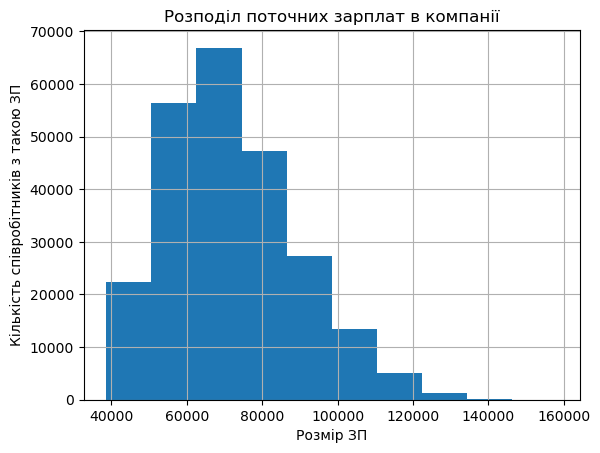

In [150]:
plt.hist(res_current[['salary']])
plt.title('Розподіл поточних зарплат в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП')
plt.grid(True);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [151]:
con.close()